<a href="https://colab.research.google.com/github/Rayssa-Nunes/analise-marketing/blob/main/analise_de_correlacao_e_associacao_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Correlação e Associação

## Contextualização
Você trabalha no setor de marketing de um site de produtos esportivos e recebeu uma base contendo informações de venda desses produtos, assim como gastos com anúncios e satisfação do cliente;

Para fazer a análise usaremos a correlação de Pearson.

## Correlação de Pearson
O coeficiente de correlação de Pearson é uma ferramenta estatística que mede a intensidade e a direção da relação linear entre duas variáveis quantitativas.

## Interpretação do Coeficiente de Pearson
A interpretação do coeficiente de correlação de Pearson depende do valor de r:

- 0.8 ≤ |r| ≤ 1.0: correlação forte.
- 0.5 ≤ |r| < 0.8: correlação moderada.
- 0.3 ≤ |r| < 0.5: correlação fraca.
- 0.0 ≤ |r| < 0.3: correlação desprezível.

Além disso, a direção da correlação é indicada pelo sinal de r:

- r > 0: correlação positiva, onde um aumento em X está associado a um aumento em Y.
- r < 0: correlação negativa, onde um aumento em X está associado a uma diminuição em Y.

## Exercício 1 - Análise da Relação entre Anúncios e Visitas

**Situação:** Seu gestor quer reduzir o orçamento de anúncios, alegando que "os gastos com publicidade não parecem gerar mais visitas ao site".

**Pergunta:** Os dados sustentam ou refutam a hipótese do gestor?

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('Vendas_online_anuncio.xlsx')
df.head()

,Data,Gastos com Anúncios (R$),Cliques nos Anúncios,Satisfação do Cliente,Engajamento nas Redes Sociais,Visitas no Site,Vendas (unidades)
0,2020-01-01,10000,2000,8,7,15000,250
1,2020-02-01,12000,2500,7,6,18000,280
2,2020-03-01,15000,3000,9,8,20000,320
3,2020-04-01,20000,3500,8,7,22000,350
4,2020-05-01,18000,2800,7,6,19000,300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Data                           54 non-null     datetime64[ns]
 1   Gastos com Anúncios (R$)       54 non-null     int64         
 2   Cliques nos Anúncios           54 non-null     int64         
 3   Satisfação do Cliente          54 non-null     int64         
 4   Engajamento nas Redes Sociais  54 non-null     int64         
 5   Visitas no Site                54 non-null     int64         
 6   Vendas (unidades)              54 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 3.1 KB


In [ ]:
correlacao = df['Gastos com Anúncios (R$)'].corr(df['Visitas no Site'])
correlacao

np.float64(0.972276996249811)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `[Gráfico Gastos x Visitas](gastosxvisitas.png)'


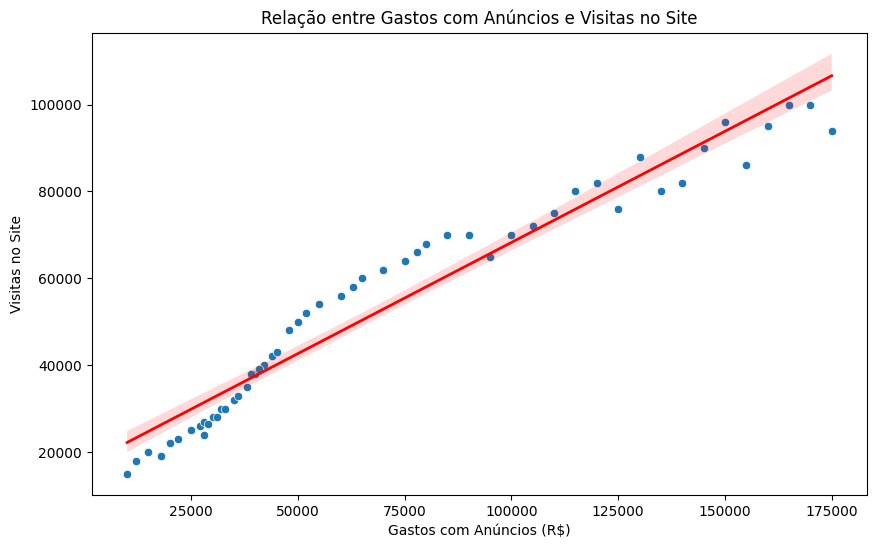

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Gastos com Anúncios (R$)', y='Visitas no Site')
sns.regplot(data=df, x='Gastos com Anúncios (R$)', y='Visitas no Site',
            scatter=False, color='red', line_kws={'linewidth': 2})

plt.title('Relação entre Gastos com Anúncios e Visitas no Site')
# plt.show()
plt.savefig("gastosxvisitas.png")
![Gráfico Gastos x Visitas](gastosxvisitas.png)

## Exercício 2 - Análise Temporal da Efetividade dos Anúncios

**Situação:** Uma analista da equipe fez a seguinte observação: "Parece que os anúncios eram mais efetivos para gerar visitas ao site até dezembro de 2022. A partir de 2023, essa relação mudou."

**Pergunta:** Essa hipótese é verdadeira?

In [ ]:
dados_ate_2022 = df[df['Data'].dt.year <= 2022]
dados_2023_adiante = df[df['Data'].dt.year >= 2023]

In [ ]:
corr_ate_2022 = dados_ate_2022['Gastos com Anúncios (R$)'].corr(dados_ate_2022['Visitas no Site'])
corr_ate_2022

np.float64(0.9900698901483211)

In [ ]:
corr_2023_adiante = dados_2023_adiante['Gastos com Anúncios (R$)'].corr(dados_2023_adiante['Visitas no Site'])
corr_2023_adiante

np.float64(0.9311515673120407)

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `[Gráfico Gastos x Visitas (até 2022)](gastosxvisitas2022.png)'


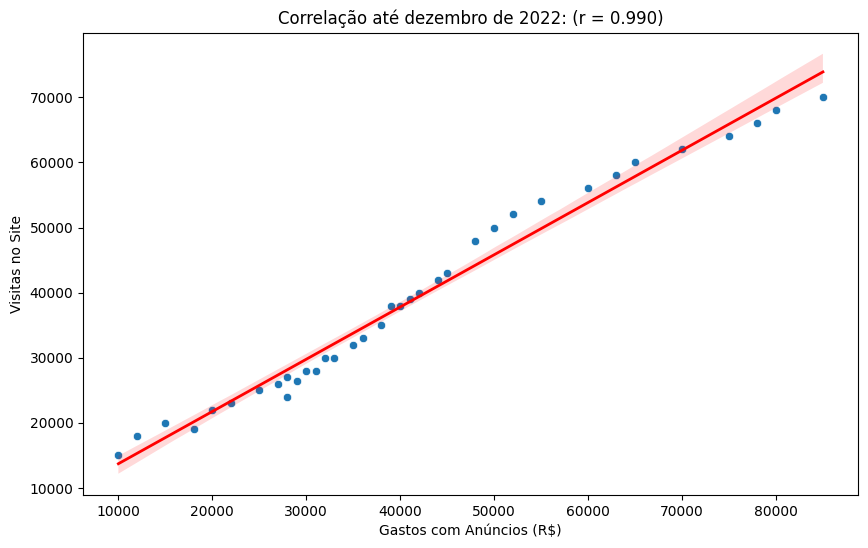

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados_ate_2022, x='Gastos com Anúncios (R$)', y='Visitas no Site')
sns.regplot(data=dados_ate_2022, x='Gastos com Anúncios (R$)', y='Visitas no Site',
            scatter=False, color='red', line_kws={'linewidth': 2})

plt.title(f'Correlação até dezembro de 2022: (r = {corr_ate_2022:.3f})')
# plt.show()
plt.savefig("gastosxvisitas2022.png")
![Gráfico Gastos x Visitas (até 2022)](gastosxvisitas2022.png)

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `[Gráfico Gastos x Visitas (de 2023 em diante)](gastosxvisitas2023.png)'


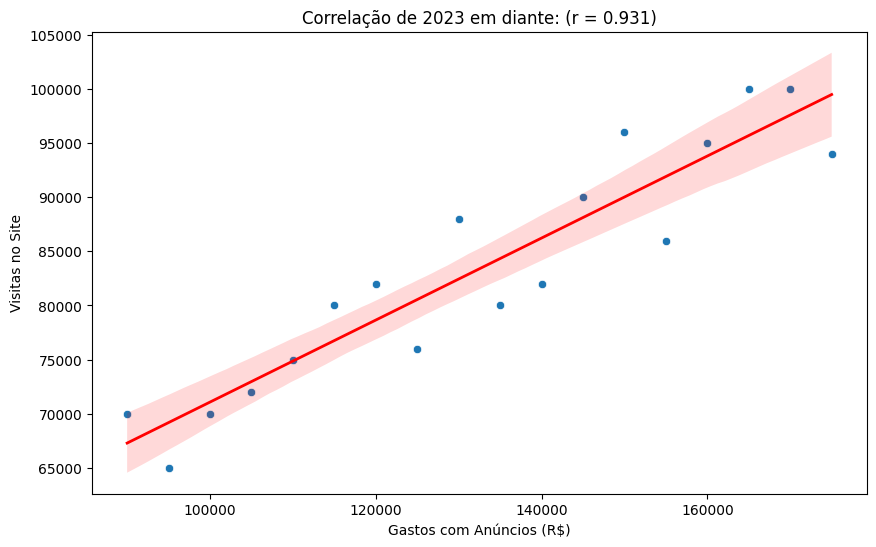

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados_2023_adiante, x='Gastos com Anúncios (R$)', y='Visitas no Site')
sns.regplot(data=dados_2023_adiante, x='Gastos com Anúncios (R$)', y='Visitas no Site',
            scatter=False, color='red', line_kws={'linewidth': 2})

plt.title(f'Correlação de 2023 em diante: (r = {corr_2023_adiante:.3f})')
# plt.show()
plt.savefig("gastosxvisitas2023.png")
![Gráfico Gastos x Visitas (de 2023 em diante)](gastosxvisitas2023.png)

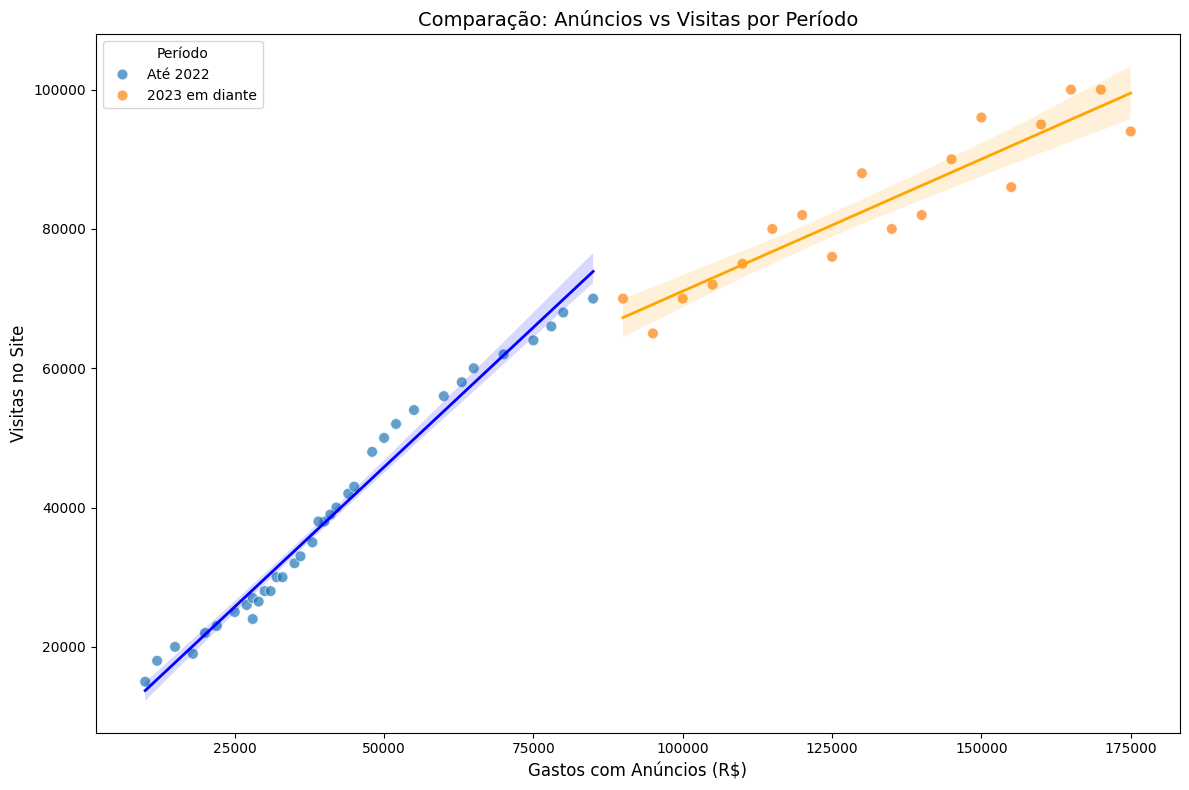

In [ ]:
# Coluna para identificar o período
df['Período'] = df['Data'].apply(lambda x: 'Até 2022' if x <= pd.Timestamp('2022-12-31') else '2023 em diante')

# Gráfico comparativo
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Gastos com Anúncios (R$)', y='Visitas no Site',
                hue='Período', s=60, alpha=0.7)

# Linha de tendência para cada período
sns.regplot(data=df[df['Período'] == 'Até 2022'],
            x='Gastos com Anúncios (R$)', y='Visitas no Site',
            scatter=False, color='blue', line_kws={'linewidth': 2})

sns.regplot(data=df[df['Período'] == '2023 em diante'],
            x='Gastos com Anúncios (R$)', y='Visitas no Site',
            scatter=False, color='orange', line_kws={'linewidth': 2})

plt.title('Comparação: Anúncios vs Visitas por Período', fontsize=14)
plt.xlabel('Gastos com Anúncios (R$)', fontsize=12)
plt.ylabel('Visitas no Site', fontsize=12)
plt.legend(title='Período')
plt.tight_layout()
plt.savefig("gastosxvisitascomparativo.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df.head()

,Data,Gastos com Anúncios (R$),Cliques nos Anúncios,Satisfação do Cliente,Engajamento nas Redes Sociais,Visitas no Site,Vendas (unidades),Período
0,2020-01-01,10000,2000,8,7,15000,250,Até 2022
1,2020-02-01,12000,2500,7,6,18000,280,Até 2022
2,2020-03-01,15000,3000,9,8,20000,320,Até 2022
3,2020-04-01,20000,3500,8,7,22000,350,Até 2022
4,2020-05-01,18000,2800,7,6,19000,300,Até 2022


In [ ]:
df.tail()

,Data,Gastos com Anúncios (R$),Cliques nos Anúncios,Satisfação do Cliente,Engajamento nas Redes Sociais,Visitas no Site,Vendas (unidades),Período
49,2024-02-01,155000,20000,9,9,86000,1700,2023 em diante
50,2024-03-01,160000,20500,8,8,95000,1750,2023 em diante
51,2024-04-01,165000,21000,10,10,100000,1800,2023 em diante
52,2024-05-01,170000,21500,10,10,100000,1850,2023 em diante
53,2024-06-01,175000,22000,10,10,94000,1900,2023 em diante


## Exercício 3 - Anúncios e Engajamento nas Redes Sociais

**Situação:** A gestora de redes sociais discorda da proposta de corte no orçamento, argumentando que "os anúncios são essenciais para manter o engajamento nas redes sociais".

**Pergunta:** Qual é a correlação entre gastos com anúncios e engajamento nas redes sociais?

In [ ]:
correlacao = df['Gastos com Anúncios (R$)'].corr(df['Engajamento nas Redes Sociais'])
correlacao

np.float64(0.2215960697589697)

## Exercício 4 - Fatores que Influenciam o Engajamento

**Situação:** A gestora de redes sociais te enviou um e-mail perguntando: "Além dos anúncios, que outras variáveis da nossa base de dados podem estar relacionadas ao engajamento nas redes sociais?"

**Pergunta:** Quais fatores mostram correlação mais forte com o engajamento?

In [ ]:
colunas = ['Gastos com Anúncios (R$)', 'Cliques nos Anúncios', 'Satisfação do Cliente', 'Visitas no Site', 'Vendas (unidades)']

for i in colunas:
    print(f'{i} = {df["Engajamento nas Redes Sociais"].corr(df[i]):.3f}')

Gastos com Anúncios (R$) = 0.222
Cliques nos Anúncios = 0.231
Satisfação do Cliente = 0.968
Visitas no Site = 0.248
Vendas (unidades) = 0.232


## Exercício 5 - Matriz de Correlação Completa e Análise de Vendas

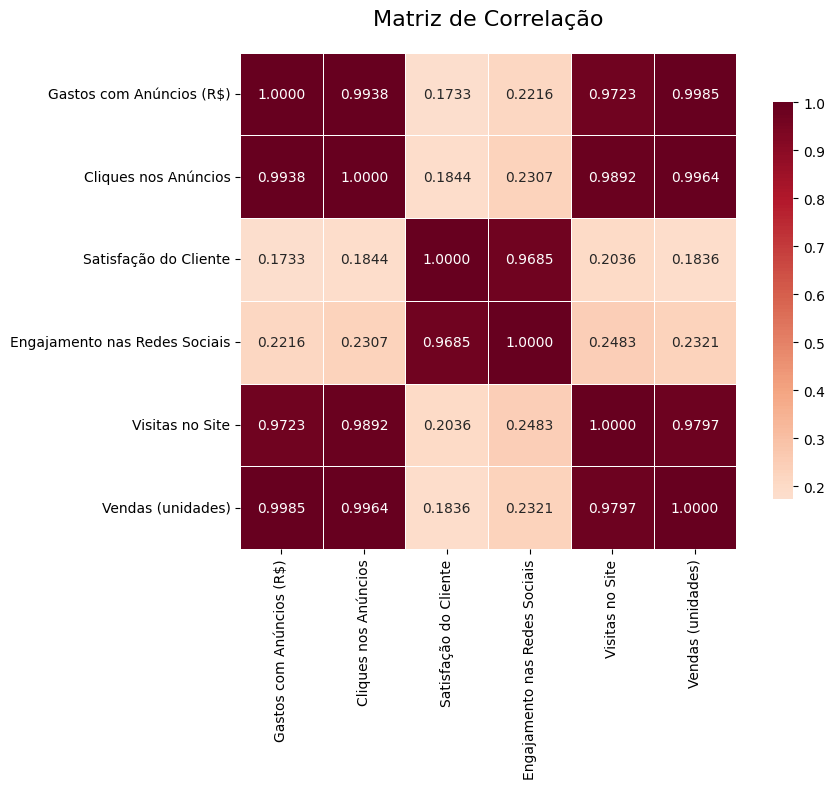

In [ ]:
# Selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcular correlação apenas das colunas numéricas
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='RdBu_r',
            center=0,
            fmt='.4f',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8})

plt.title('Matriz de Correlação', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig("matrizcorrelacao.png", dpi=300, bbox_inches='tight')
plt.show()

## Conclusão

**Resposta 1**

Utilizando a correlação de Pearson, obtemos a correlação de 0,97. O que indica uma correlação forte positiva entre essas variáveis, ou seja, quando aumento os **Gastos com Anúncios (R$)** as **Visitas no Site** também tendem a aumentar. Sendo assim, a alegação do gestor pode ser errônea.

**Resposta 2**

Analisando as variáveis **Gastos com Anúncios (R$)** as **Visitas no Site** para os anos até 2022 (r = 0,99) e de 2023 em diante (r = 0,93) observamos que houve uma queda de pouco menos de 6% na correlação entre essas variáveis.

Apesar da redução, a correlação permanece forte positiva em ambos os períodos, indicando que os anúncios continuam sendo efetivos em relação as visitas no site. Portanto, a hipótese da analista é parcialmente verdadeira.

**Resposta 3**

A análise da correlação entre as variáveis **Gastos com Anúncios (R$)** e **Engajamento nas Redes Sociais** revelou um coeficiente de correlação de 0,22, caracterizando uma relação fraca entre essas variáveis.

Portanto, o aumento isolado dos gastos com anúncios não garante necessarimente um crescimento proporcional no engajamento.

**Resposta 4**

A análise de correlação entre as variáveis e o **Engajamento nas Redes Sociais** mostrou que apenas a **Satisfação do Cliente** apresenta correlação forte e positiva (0,97). As demais variáveis têm correlação fraca:

- Satisfação do Cliente = 0,97 (correlação forte)
- Visitas no Site = 0,25 (correlação fraca)
- Vendas (unidades) = 0,23 (correlação fraca)
- Cliques nos Anúncios = 0,23 (correlação fraca)
- Gastos com Anúncios (R$) = 0,22 (correlação fraca)

De acordo com esse resultado, umas das possíveis variáveis que poderíamos fazer tratativas para melhorar o engajamento nas redes sociais seria a satisfação do cliente.

**Resposta 5**

A análise da matriz de correlação revela que três variáveis apresentam correlação forte e positiva com as Vendas:

- Gastos com Anúncios (R$) = 0,99 (correlação muito forte)
- Cliques nos Anúncios = 0,99 (correlação muito forte)
- Visitas no Site = 0,97 (correlação forte)

Esses resultados indicam uma relação direta entre o investimento em publicidade, o tráfego gerado e o volume de vendas.